In [57]:
import pandas as pd

# Import these to display entire dataframes
from IPython.display import display, HTML

# Import graph_objects from the plotly package to display figures when saving the notebook as an HTML
# Import numpy for statistics
import plotly.graph_objects as go
import numpy as np

# Import additional packages for specific visuals
import missionbio.mosaic.utils as mutils
import matplotlib.pyplot as plt

# Import the colors
from missionbio.mosaic.constants import COLORS
import seaborn as sns

In [58]:
# Load the CSV file
file_path = '/Users/surendraneupane/Downloads/normalized_counts.csv'
data = pd.read_csv(file_path)
 
# Display the first few rows of the dataframe to understand its structure
data.head()

,normalized_counts,label,CD10,CD117,CD11b,CD11c,CD123,CD13,CD138,CD14,...,CD7,CD71,CD8,CD83,CD90,FcεRIα,HLA-DR,IgG1,IgG2a,IgG2b
0,AACAACCTAACTCCGGTT,6,1.182715,1.350772,0.359929,0.858461,0.585754,0.627666,0.840962,0.937239,...,1.319699,2.301223,0.684123,0.750904,0.725325,0.793299,0.932596,0.905599,0.785516,1.043762
1,AACAACCTAAGCTGCACT,1,-0.098328,0.014722,0.351804,-0.130599,0.554513,-0.039787,0.271870,-0.184491,...,-0.128249,0.440985,1.444871,-0.316960,-0.146978,0.128235,-0.044800,0.841787,0.051666,-0.095054
2,AACAACCTAGAAGGATCA,1,-0.267273,0.738713,0.888291,0.827513,-0.288381,-0.079503,0.716256,0.041999,...,0.131202,0.666392,1.431111,-0.214889,0.009174,0.769085,-0.054616,0.020477,0.187485,0.014354
3,AACAACCTAGTGTTCCAG,10,0.946172,0.982655,0.845177,0.249589,1.173872,0.646587,0.738863,-0.158744,...,0.875199,1.413229,0.348008,0.690948,0.620917,0.110120,1.090323,-0.221041,-0.187980,-0.111244
4,AACAACCTATAGCTAAGA,13,1.059650,-0.027414,0.173434,0.725787,0.726510,0.606458,1.111070,-0.152823,...,1.297940,0.749108,1.392403,1.046617,-0.113108,0.602499,-0.003995,0.624309,0.116299,-0.189496


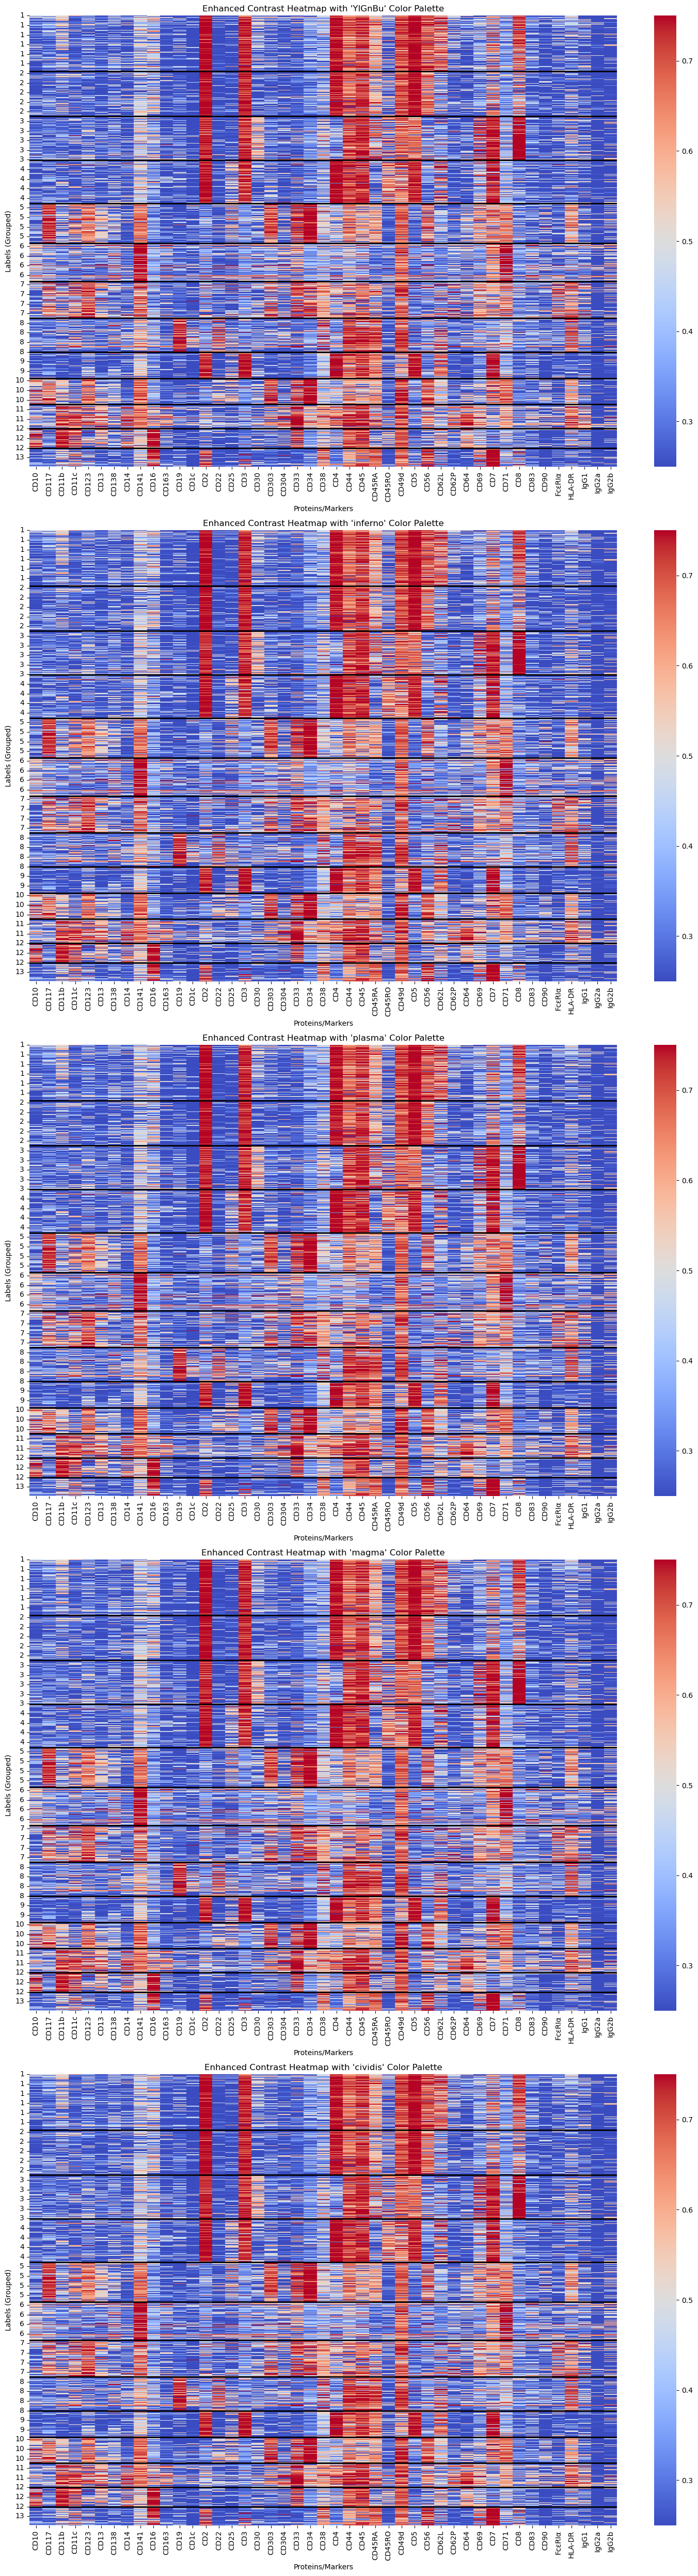

In [59]:
# Drop the 'normalized_counts' column and set 'label' as the index
data_for_heatmap = data.drop(columns=['normalized_counts'])
data_for_heatmap.set_index('label', inplace=True)

# Sort the data by the 'label' column while keeping each row separate
sorted_data = data_for_heatmap.sort_values(by='label')

# Normalize each column independently
for col in sorted_data.columns:
    sorted_data[col] = (sorted_data[col] - sorted_data[col].min()) / (sorted_data[col].max() - sorted_data[col].min())

# Finding positions for label group delineation
unique_labels = sorted_data.index.unique()
delineation_positions = [sorted_data.index.get_loc(label).stop for label in unique_labels[:-1]]

# Generating heatmaps with distinct black lines for delineation
color_palettes = ["YlGnBu", "inferno", "plasma", "magma", "cividis"]
contrast_min, contrast_max = 0.25, 0.75
line_width = 2

fig, axes = plt.subplots(len(color_palettes), 1, figsize=(15, 10 * len(color_palettes)))

for i, palette in enumerate(color_palettes):
    sns.heatmap(sorted_data, cmap="coolwarm", vmin=contrast_min, vmax=contrast_max, ax=axes[i])
    axes[i].set_title(f"Enhanced Contrast Heatmap with '{palette}' Color Palette")
    axes[i].set_xlabel("Proteins/Markers")
    axes[i].set_ylabel("Labels (Grouped)")

    # Adding thicker black lines at the end of each label group
    for position in delineation_positions:
        axes[i].axhline(position, color='black', lw=line_width)

plt.tight_layout()
plt.show()

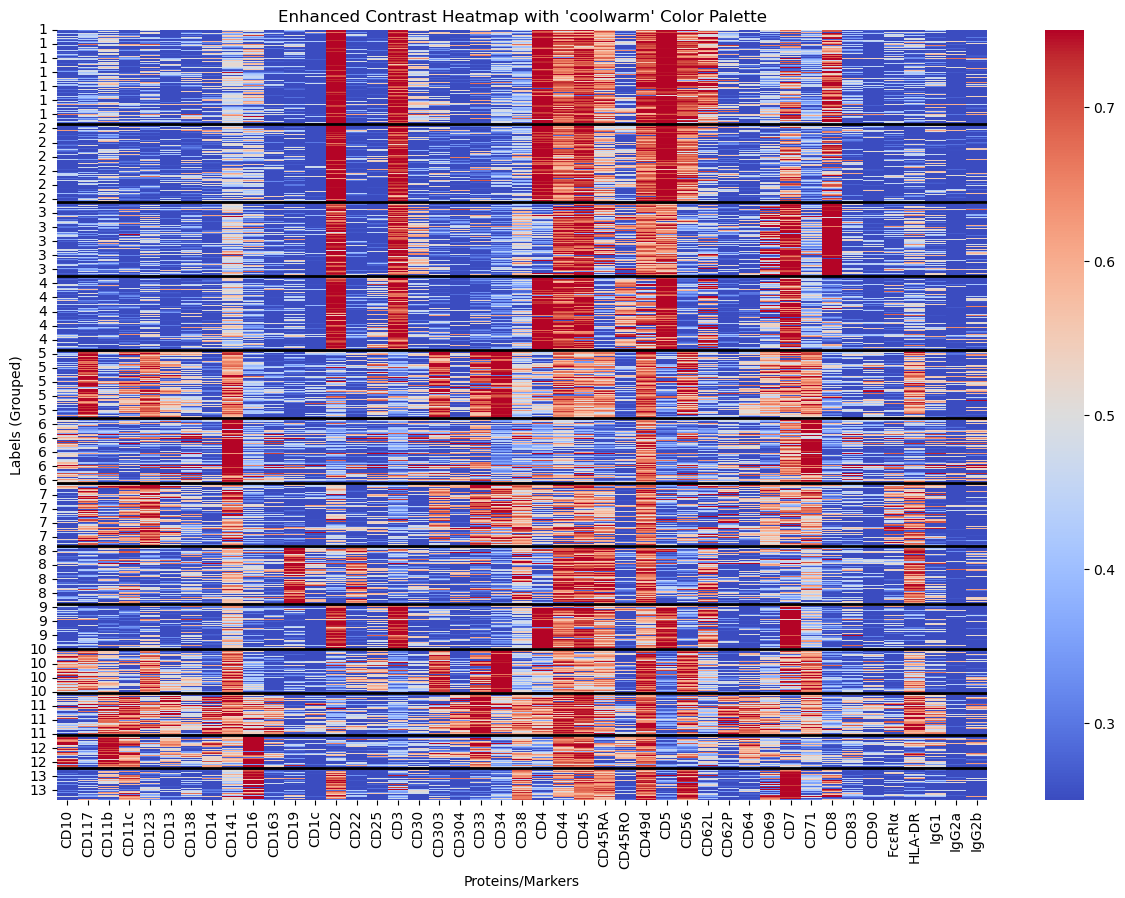

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Drop the 'normalized_counts' column and set 'label' as the index
data_for_heatmap = data.drop(columns=['normalized_counts'])
data_for_heatmap.set_index('label', inplace=True)

# Sort the data by the 'label' column while keeping each row separate
sorted_data = data_for_heatmap.sort_values(by='label')

# Normalize each column independently
for col in sorted_data.columns:
    sorted_data[col] = (sorted_data[col] - sorted_data[col].min()) / (sorted_data[col].max() - sorted_data[col].min())

# Finding positions for label group delineation
unique_labels = sorted_data.index.unique()
delineation_positions = [sorted_data.index.get_loc(label).stop for label in unique_labels[:-1]]

# Generating a single heatmap with the 'coolwarm' color palette
plt.figure(figsize=(15, 10))
sns.heatmap(sorted_data, cmap="coolwarm", vmin=0.25, vmax=0.75)

# Adding thicker black lines for label group delineation
for position in delineation_positions:
    plt.axhline(position, color='black', lw=2)

plt.title("Enhanced Contrast Heatmap with 'coolwarm' Color Palette")
plt.xlabel("Proteins/Markers")
plt.ylabel("Labels (Grouped)")
plt.show()
